In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
from tensorflow.keras.utils import img_to_array
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib. pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras
import os
from keras.models import model_from_json
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip

--2023-03-28 16:53:45--  https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip [following]
--2023-03-28 16:53:46--  https://www.dropbox.com/s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce867e5a3f4c144f04adb1cf8a7.dl.dropboxusercontent.com/cd/0/inline/B5HLQLW15ik_SGnOLRftyPJwugw386eMGBjieoCewJldjItGaRlr55ahcDhRVzDfYHZsz9Nj6vdXDUV5-BI9hnLkkvIniq4wuRgrt1jdrh1vBMjeRVhWLPuFEh84Wbg7T5pXNQ4u98vTur6-AynmJD8A9YcIOHLz2iYP1RjeJfXn3A/file# [following]
--2023-03-28 16:53:46--  https://uce867e5a3f4c144f04adb1cf8a7.dl.dropboxusercontent.com/cd/0/inline/B5HLQLW15ik_SGnOLRftyPJwug

In [ ]:
!unzip 28577_36420_bundle_archive.zip

Archive:  28577_36420_bundle_archive.zip
  inflating: fer2013.csv             


In [ ]:
df = pd.read_csv('/content/fer2013.csv')

In [ ]:
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
x_train,y_train,x_test,y_test = [],[],[],[]

In [ ]:
for index, row in df.iterrows():
  val=row['pixels'].split(" ")
  try:
    if 'Training' in row['Usage']:
      x_train.append(np.array(val, 'float32'))
      y_train.append(row['emotion'])
    elif 'Publictest' in row['Usage']:
      x_test.append(np.array(val, 'float32'))
      y_test.append(row('emotion'))
  except:
    print(f"error occured at index : {index} and row: {row}")

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48

In [ ]:
x_train = np.array(x_train,'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test, 'float32')

In [ ]:
y_train = to_categorical(y_train,num_classes=num_labels)
y_test = to_categorical(y_test, num_classes=num_labels)

In [ ]:

x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train, axis=0)
x_test -= np.mean(x_test, axis=0)
x_test /= np.std(x_test, axis=0)
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
print (f"shape:(x_train.shape]")

shape:(x_train.shape]


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# model.add (Batchiorsalization.))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add (BatchNorsalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

# model.add (Batchiorsalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                        

In [ ]:
#Compliling the nodel
model.compile(loss=categorical_crossentropy,
optimizer='sgd',
metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data = (x_test,y_test),
shuffle=True)

Epoch 1/200
449/449 [==============================] - 21s 22ms/step - loss: 1.8239 - accuracy: 0.2491
Epoch 2/200
449/449 [==============================] - 9s 21ms/step - loss: 1.7926 - accuracy: 0.2550
Epoch 3/200
449/449 [==============================] - 10s 23ms/step - loss: 1.7800 - accuracy: 0.2540
Epoch 4/200
449/449 [==============================] - 13s 28ms/step - loss: 1.7674 - accuracy: 0.2621
Epoch 5/200
449/449 [==============================] - 9s 21ms/step - loss: 1.7526 - accuracy: 0.2794
Epoch 6/200
449/449 [==============================] - 9s 21ms/step - loss: 1.7259 - accuracy: 0.3022
Epoch 7/200
449/449 [==============================] - 9s 21ms/step - loss: 1.6971 - accuracy: 0.3199
Epoch 8/200
449/449 [==============================] - 9s 21ms/step - loss: 1.6676 - accuracy: 0.3401
Epoch 9/200
449/449 [==============================] - 10s 22ms/step - loss: 1.6453 - accuracy: 0.3514
Epoch 10/200
449/449 [==============================] - 9s 21ms/step - loss: 1

In [ ]:
#Saving the model to use it later on
fer_json = model.to_json()
with open('trained_data_face.json', 'w') as json_file:
  json_file.write(fer_json)
model.save_weights("trained_data_face.h5")

In [ ]:
model = model_from_json(open("trained_data_face.json",'r').read())
model.load_weights('trained_data_face.h5')
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')


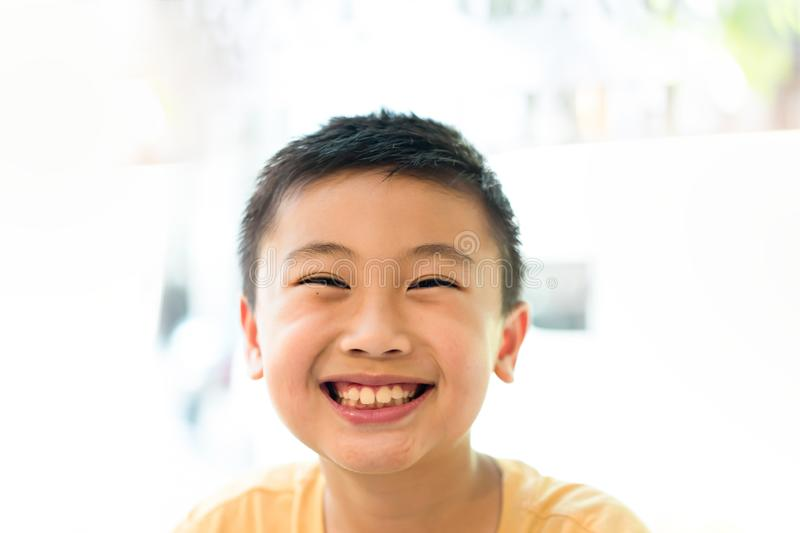

In [ ]:

test_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/happy-little-boy-smiley-face-portrait-human-concept-freshness-133726078.jpg')
cv2_imshow(test_image)

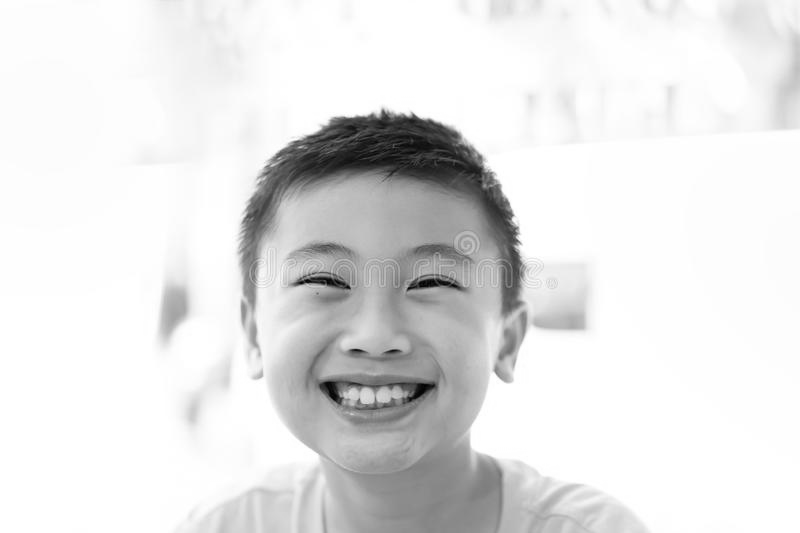

In [ ]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

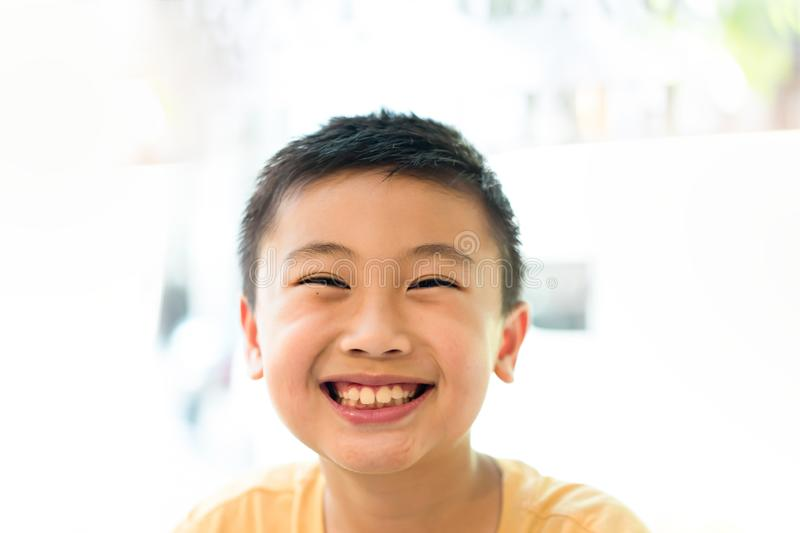

In [ ]:

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
cv2_imshow(test_image)

In [ ]:

model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

NameError: ignored

In [ ]:
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
  cv2.rectangle(test_image,(x,y), (x+w,y*h), (255,0,0))
  roi_gray=gray_image[y:y+w,x:x+h]

  roi_gray =cv2.resize(roi_gray,(48,48))

  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expanddims(image_pixels, axis = 0)
  image_pixels /= 255

  predictions = model.predict(image_pixels)

  max_index = np.argnax(predictions[0])

  emotion_detection = ('angry', "disgust", 'fear', "happy', 'sad', 'surprise","nuetral")
  emotion_prediction = emotion_detection[max_index]

  #CV2.putText (resize image, emotion prediction, (int(x), Int(y)))
  print(emotion_prediction)
  #presize_image = cv2.resize(test_image, (1000, 700))
  #cv2_imshow(resize_image)

  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (50, 50)
  fontScale=1
  color = (255, 8, 0)
  thickness = 2
  image = cv2.putText(test_image, emotion_prediction, org, font, fontScale, color, thickness, cv2.LINE_AA)
  cv2_imshow(image)